In [32]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import lightgbm as lgb
from lightgbm import LGBMRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgbm
import xgboost as xg

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score
from sklearn.model_selection import GridSearchCV

from yellowbrick.regressor import ResidualsPlot
from sklearn.tree import export_graphviz 

import missingno as msno

import shap

In [33]:
os.chdir("C:/Users/M22UO01/Downloads/Dossier memoire")

In [34]:
data = pd.read_csv("C:/Users/M22UO01/Downloads/Dossier memoire/data4_modif.csv")

In [35]:
df = data.copy()

In [125]:
df.tail(10)

t06_siren  Entre 35 et 44 ans  Entre 45 et 54 ans  Moins de 35 ans  \
3041  958505653                 NaN                0.43             0.57   
3042  969500305                0.33                0.20             0.07   
3043  971505433                0.20                0.40             0.30   
3044  972200661                0.38                0.12             0.50   
3045  975420217                0.18                0.18             0.27   
3046  976120279                0.19                0.19             0.41   
3047  986120186                0.33                0.22             0.14   
3048  998259816                0.43                0.29             0.29   
3049  998338313                 NaN                0.14             0.57   
3050  998437412                0.29                0.43             0.14   

      Plus de 55 ans  effectif_salarie  arret_annuel_siren  Feminin  Masculin  \
3041             NaN             10.77                 621     0.57      0.43   
3042            0.40             18.32                 330     0.07      0.33   
3043            0.10             20.56                 394      NaN       NaN   
3044             NaN             49.46                 331      NaN       NaN   
3045            0.36             33.12                1069     0.36      0.64   
3046            0.22             51.96                 605     0.50      0.50   
3047            0.31            204.11                2495     0.24      0.76   
3048             NaN             12.83                 193     0.43      0.57   
3049            0.29              9.34                 109      NaN      1.00   
3050            0.14             24.26                 364     0.71      0.29   

      Non mentionne  ...  Independant  Ouvrier  cdi autre  cdi public  \
3041            NaN  ...          NaN      NaN        NaN         NaN   
3042            0.6  ...          NaN     0.33        NaN         NaN   
3043            1.0  ...          NaN     0.10        NaN         NaN   
3044            1.0  ...          NaN      NaN        NaN         NaN   
3045            NaN  ...          NaN     0.55        NaN         NaN   
3046            NaN  ...          NaN     0.53        NaN         NaN   
3047            NaN  ...          NaN     0.46        NaN         NaN   
3048            NaN  ...          NaN      NaN        NaN         NaN   
3049            NaN  ...          NaN     1.00        NaN         NaN   
3050            NaN  ...          NaN      NaN        NaN         NaN   

      Temps partiel  Temps plein  autre regime  regime agricole  \
3041            NaN         1.00           NaN              NaN   
3042            NaN         1.00           NaN              NaN   
3043            NaN         1.00           NaN              NaN   
3044           0.06         0.94           NaN              NaN   
3045           0.18         0.82           NaN              NaN   
3046            NaN         1.00           NaN             0.75   
3047           0.01         0.99           NaN              NaN   
3048           0.29         0.71           NaN              NaN   
3049            NaN         1.00           NaN              NaN   
3050           0.71         0.29           NaN              NaN   

      regime special RATP  taux_absenteisme  
3041                  NaN         21.840972  
3042                  NaN          6.823144  
3043                  NaN          7.258873  
3044                  NaN          2.534953  
3045                  NaN         12.225974  
3046                  NaN          4.410444  
3047                  NaN          4.630228  
3048                  NaN          5.698056  
3049                  NaN          4.420544  
3050                  NaN          5.683380  

[10 rows x 22 columns]

In [6]:
df.columns

Index(['t06_siren', 'Entre 35 et 44 ans', 'Entre 45 et 54 ans',
       'Moins de 35 ans', 'Plus de 55 ans', 'effectif_salarie',
       'arret_annuel_siren', 'Feminin', 'Masculin', 'Non mentionne', 'Cadre',
       'Employe', 'Independant', 'Ouvrier', 'cdi autre', 'cdi public',
       'Temps partiel', 'Temps plein', 'autre regime', 'regime agricole',
       'regime special RATP', 'taux_absenteisme'],
      dtype='object')

In [7]:
df.shape

(3051, 22)

In [8]:
# ajout d'une nouvelle variable marche
# marche_dummies = pd.get_dummies(df[['marche']], drop_first=True)
# marche = marche_dummies.select_dtypes('uint8').astype('float64')
# df = pd.concat([df, marche], sort = False, axis = 1, ignore_index = False)

# Preprocessing 

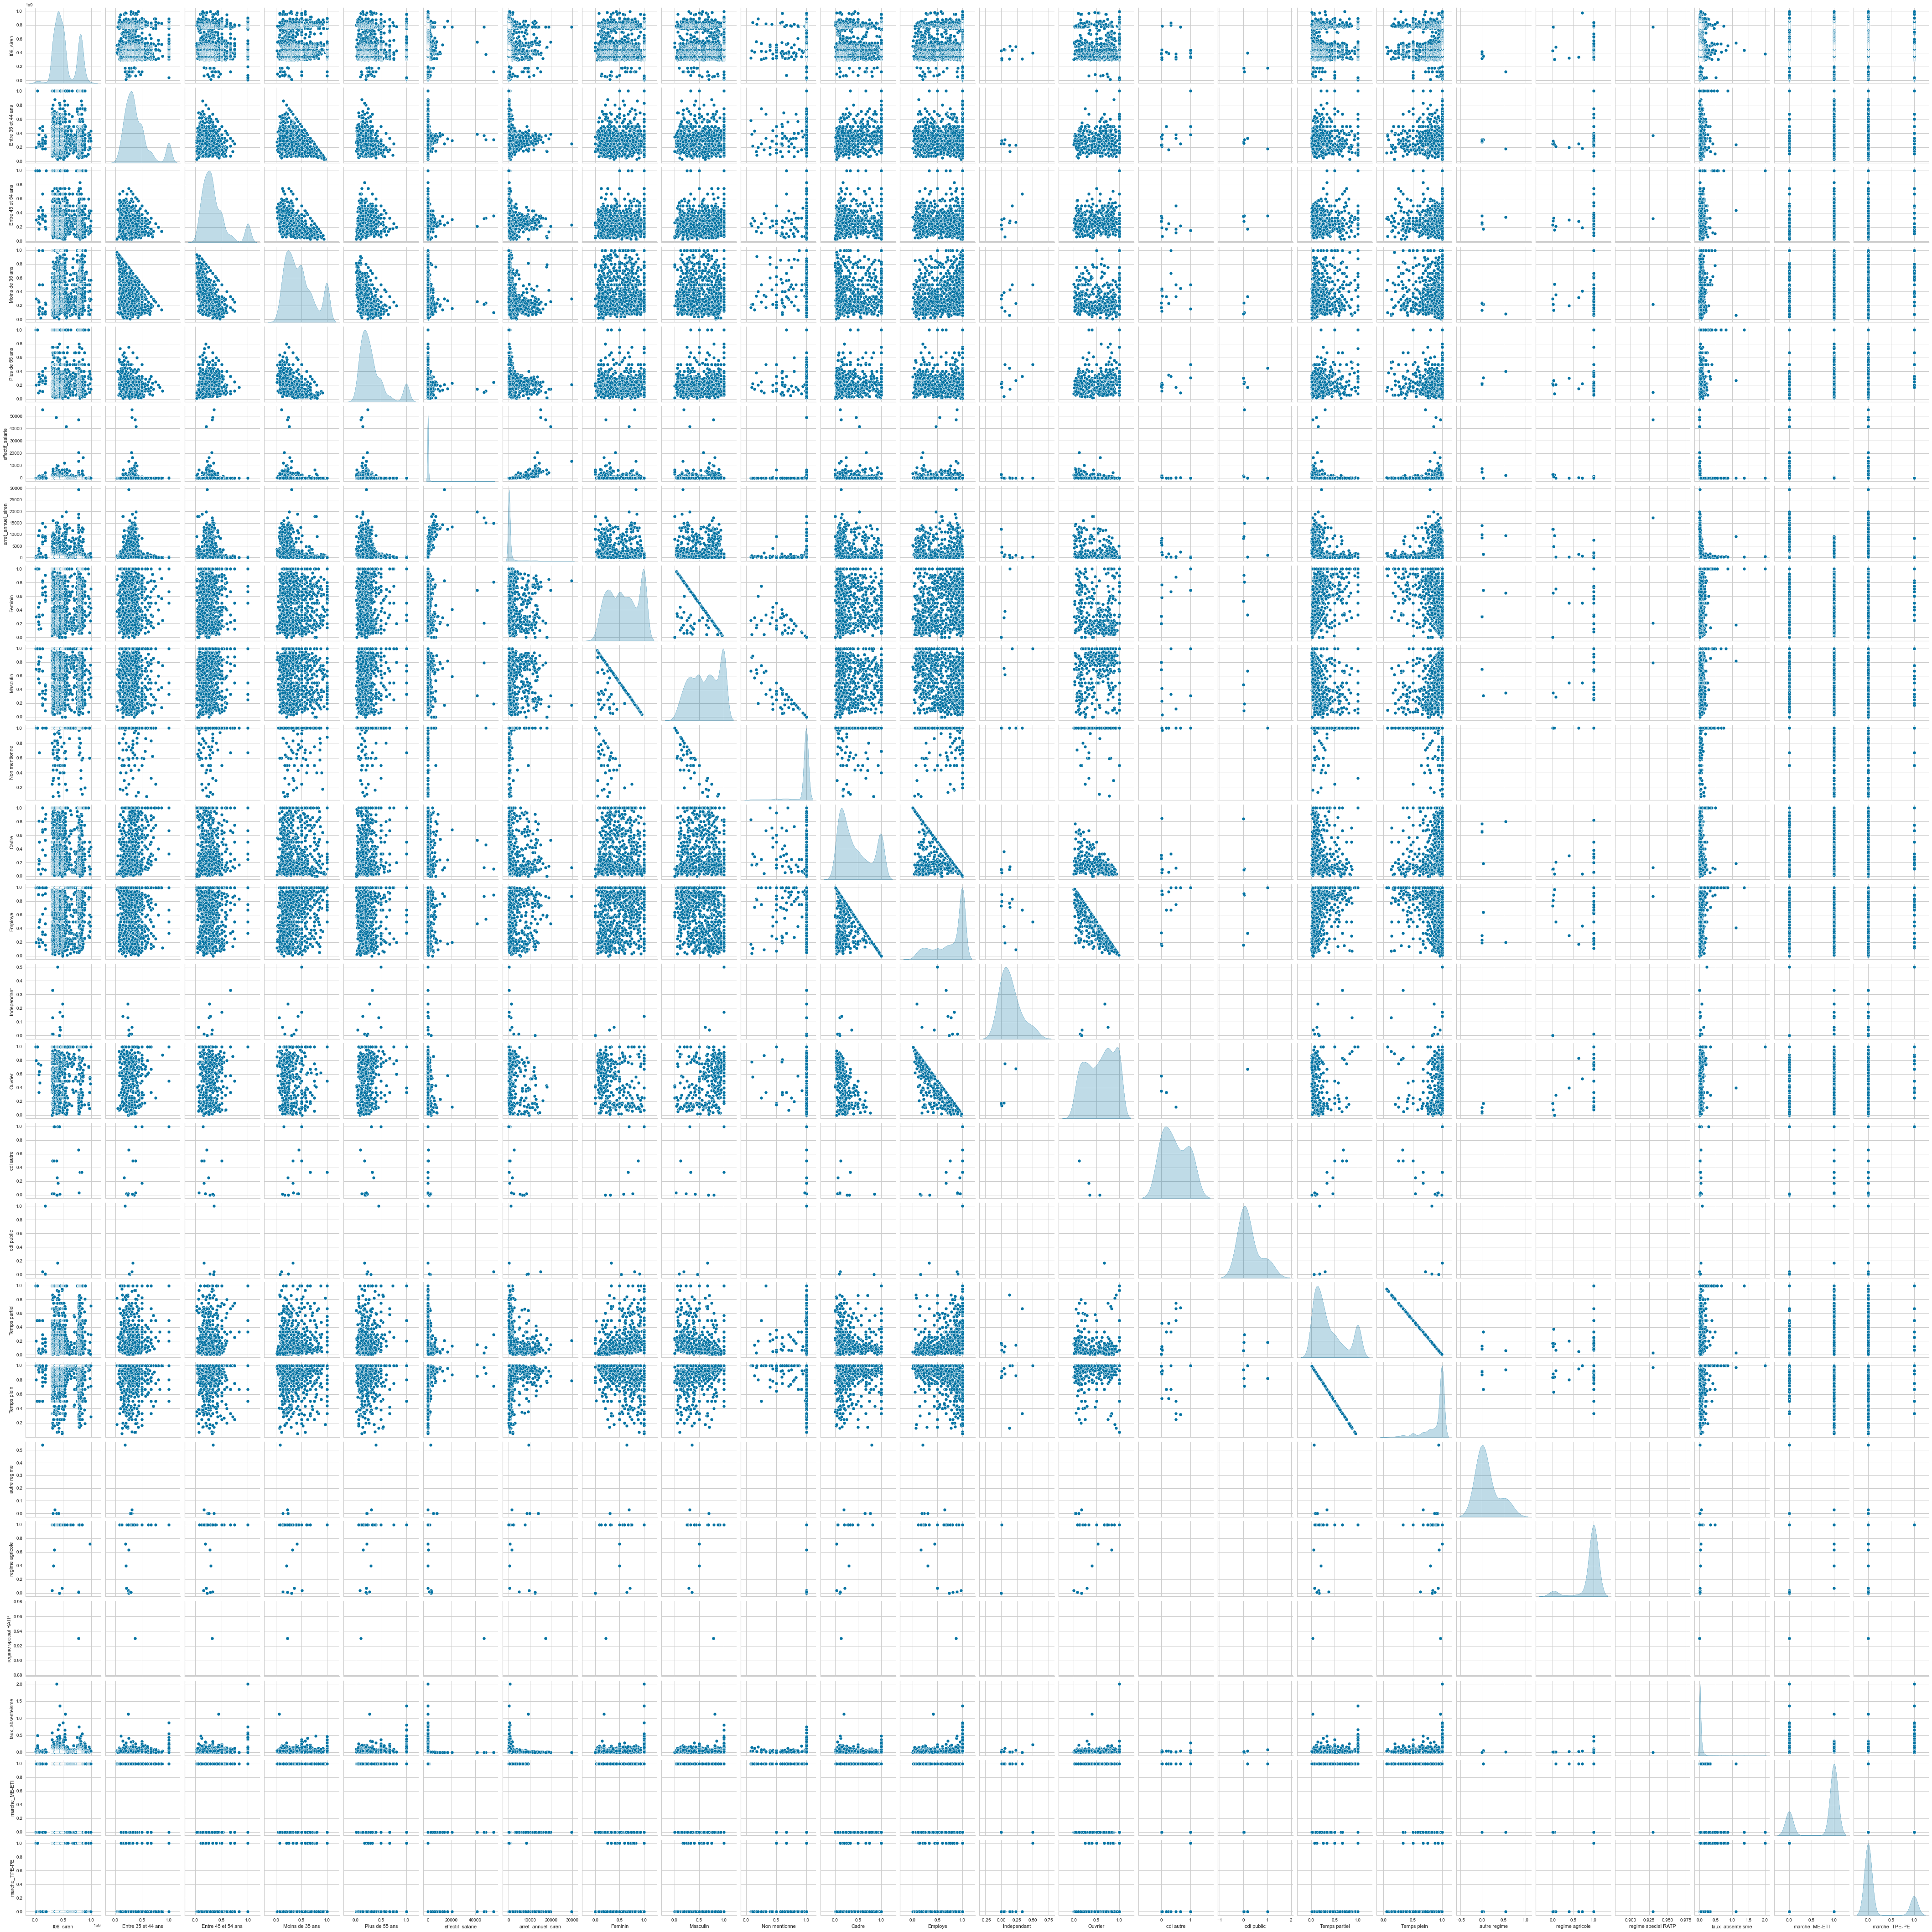

In [79]:
#histogram to see distribution of data points
sns.pairplot(data=df, diag_kind='kde')
plt.show()

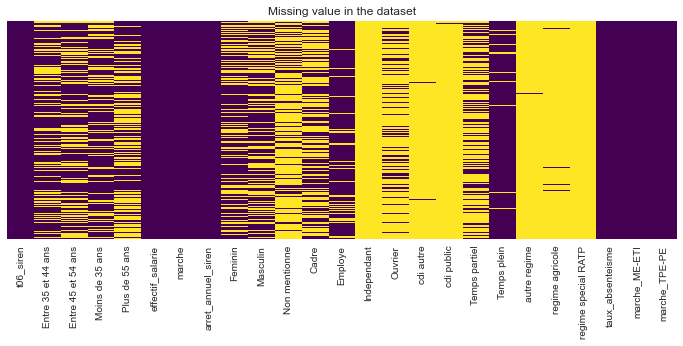

In [80]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

In [81]:
df.isnull().mean()

t06_siren              0.000000
Entre 35 et 44 ans     0.298453
Entre 45 et 54 ans     0.400790
Moins de 35 ans        0.281343
Plus de 55 ans         0.496545
effectif_salarie       0.000000
marche                 0.000000
arret_annuel_siren     0.000000
Feminin                0.400132
Masculin               0.395854
Non mentionne          0.723264
Cadre                  0.537019
Employe                0.135242
Independant            0.996380
Ouvrier                0.790392
cdi autre              0.993419
cdi public             0.998355
Temps partiel          0.579796
Temps plein            0.070089
autre regime           0.998355
regime agricole        0.976637
regime special RATP    0.999671
taux_absenteisme       0.000000
marche_ME-ETI          0.000000
marche_TPE-PE          0.000000
dtype: float64

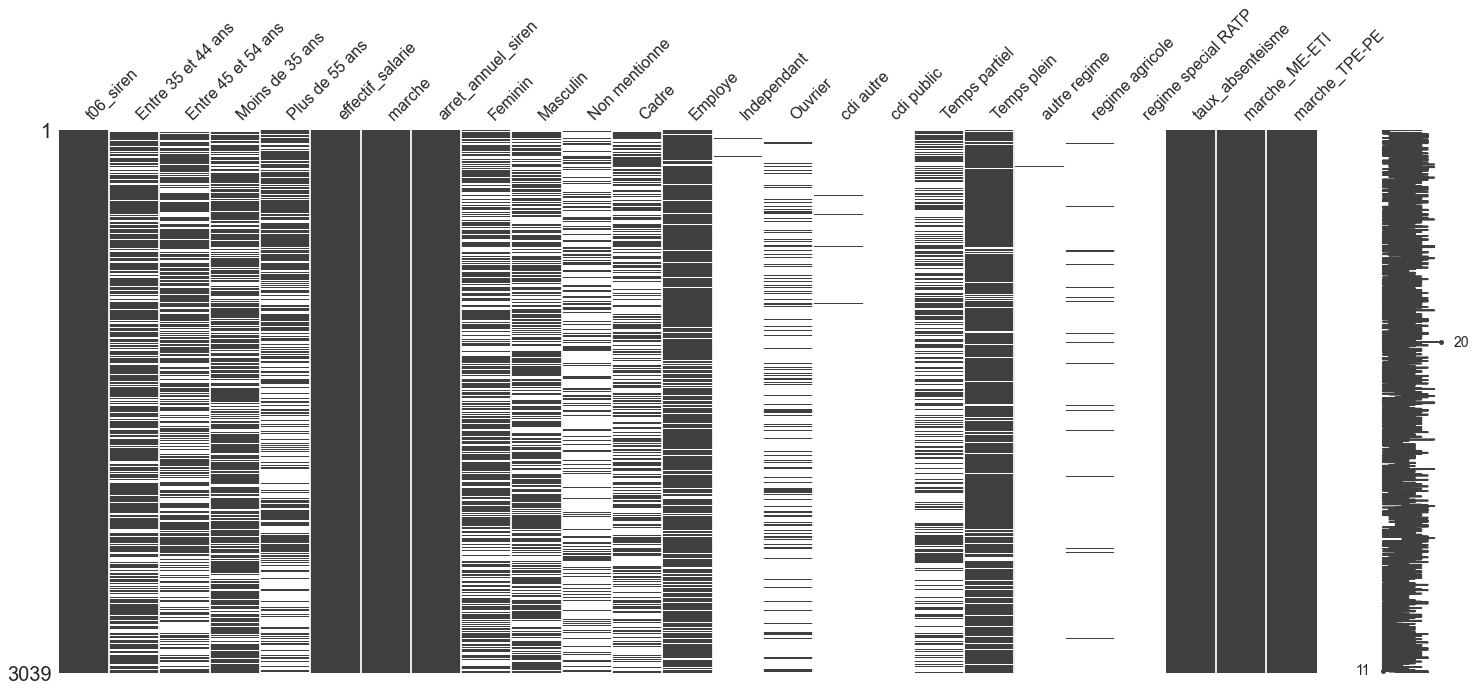

In [84]:
ax = msno.matrix(df)

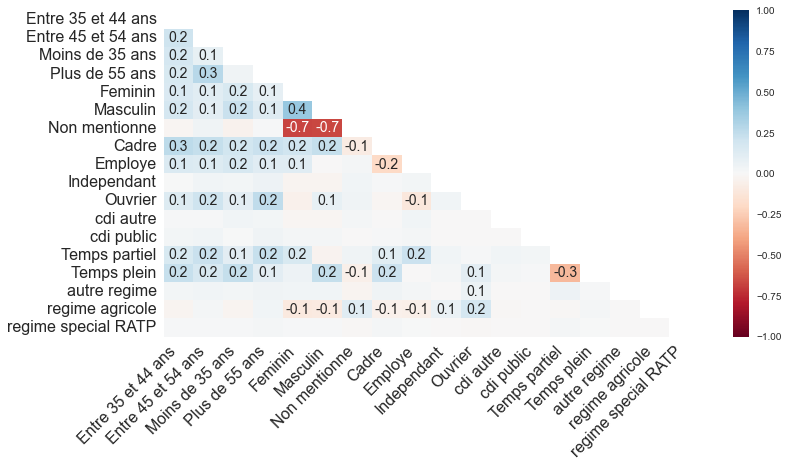

In [85]:
ax = msno.heatmap(df, figsize = (12,6))

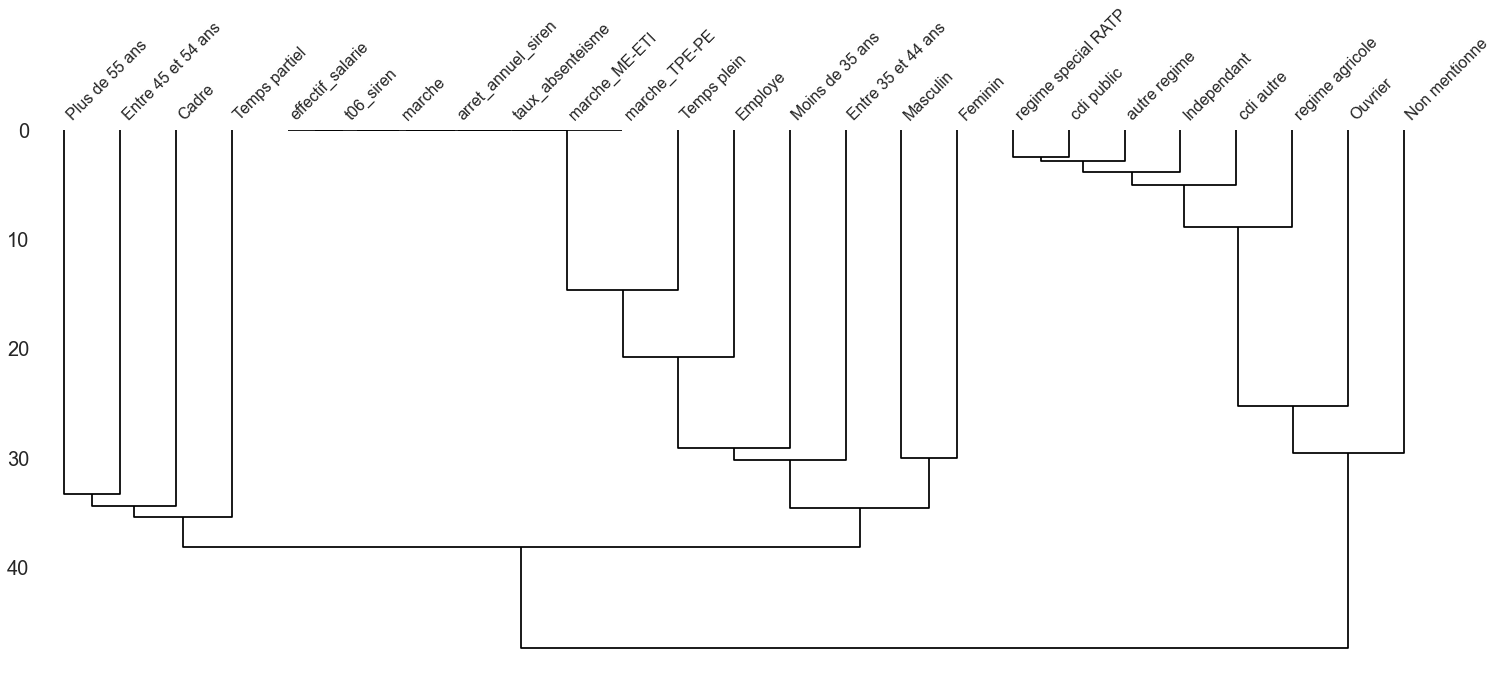

In [86]:
ax = msno.dendrogram(df)

# Construction du premier modele
Modele LightGBM

In [9]:
df.columns

Index(['t06_siren', 'Entre 35 et 44 ans', 'Entre 45 et 54 ans',
       'Moins de 35 ans', 'Plus de 55 ans', 'effectif_salarie',
       'arret_annuel_siren', 'Feminin', 'Masculin', 'Non mentionne', 'Cadre',
       'Employe', 'Independant', 'Ouvrier', 'cdi autre', 'cdi public',
       'Temps partiel', 'Temps plein', 'autre regime', 'regime agricole',
       'regime special RATP', 'taux_absenteisme'],
      dtype='object')

In [10]:
df = df.drop(columns= ['t06_siren', 'Non mentionne', 'taux_absenteisme'])

In [11]:
df.shape

(3051, 19)

In [12]:
df =df.fillna(0)

In [13]:
df.head()

Entre 35 et 44 ans  Entre 45 et 54 ans  Moins de 35 ans  Plus de 55 ans  \
0                 0.0                 1.0              0.0             0.0   
1                 0.0                 0.0              0.0             1.0   
2                 0.2                 0.3              0.3             0.2   
3                 0.0                 0.0              0.0             1.0   
4                 0.0                 0.0              0.0             1.0   

   effectif_salarie  arret_annuel_siren  Feminin  Masculin  Cadre  Employe  \
0              1.00                   5      1.0       0.0    0.0      1.0   
1              1.00                   9      0.0       1.0    0.0      0.0   
2             34.85                 617      0.3       0.7    0.0      0.2   
3              2.00                  32      1.0       0.0    0.0      1.0   
4              1.00                  11      0.0       0.0    0.0      1.0   

   Independant  Ouvrier  cdi autre  cdi public  Temps partiel  Temps plein  \
0          0.0      0.0        0.0         0.0            1.0          0.0   
1          0.0      1.0        0.0         0.0            0.0          1.0   
2          0.0      0.8        0.0         0.0            0.2          0.8   
3          0.0      0.0        0.0         0.0            0.0          1.0   
4          0.0      0.0        0.0         0.0            0.0          1.0   

   autre regime  regime agricole  regime special RATP  
0           0.0              0.0                  0.0  
1           0.0              0.0                  0.0  
2           0.0              0.0                  0.0  
3           0.0              0.0                  0.0  
4           0.0              0.0                  0.0

In [14]:
y = df['arret_annuel_siren']
X = df.drop(['arret_annuel_siren'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [15]:
params = {
    'task': 'train', 
    'boosting': 'gbdt',
    'objective': 'regression',
    'n_estimators' : 50,
    'max_depth' : 3,
    'num_leaves': 10,
    'learning_rate': 0.1,
    'metric': {'l2','l1'},
    'verbose': 3
}

In [16]:
# laoding data
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [17]:
# fitting the model
model = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.886612
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.408491
[LightGBM] [Debug] init for col-wise cost 0.000659 seconds, init for row-wise cost 0.000801 seconds
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000800 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 916
[LightGBM] [Info] Number of data points in the train set: 1830, number of used features: 13
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 766.374317
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 7 and

Found `n_estimators` in params. Will use it instead of argument


In [18]:
# prediction
y_pred = model.predict(X_test)

L'entrainement est fait ici sur l'ensemble du jeu de données, cela pourra expliquer les résultats globalement satisfaisants pour le rmse. Par contre, aucune transformation n'a été faite sur la variable cible et une méthode de type Early Stopping a été également appliqué

In [20]:
# accuracy check
mse = mean_squared_error(y_test, y_pred)
rmse = mse**(0.5)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)

MSE: 686022.87
RMSE: 828.26


In [21]:
r2_score(y_train, model.predict(X_train))

0.9044769247155563

In [22]:
r2_score(y_test, y_pred)

0.8917037097029368

In [31]:
r2_score(y_val, model.predict(X_val))

0.9227689426461352

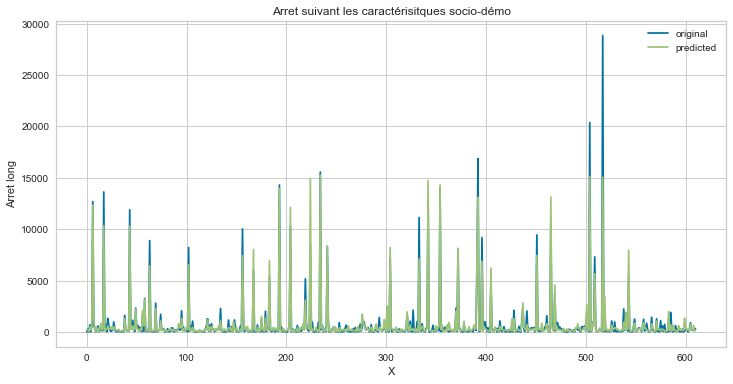

In [23]:
# visualizing in a plot
x_ax = range(len(y_test))
plt.figure(figsize=(12,6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Arret suivant les caractérisitques socio-démo")
plt.xlabel('X')
plt.ylabel('Arret long')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  



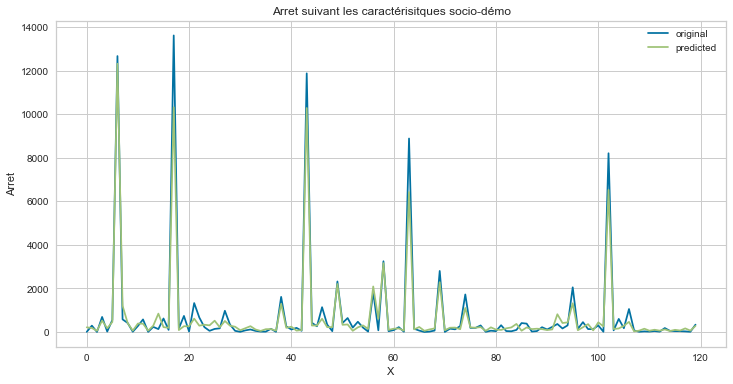

In [24]:
# visualizing in a plot

x_ax = range(len(y_test.iloc[0:120]))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test[0:120], label="original")
plt.plot(x_ax, y_pred[0:120], label="predicted")
plt.title("Arret suivant les caractérisitques socio-démo")
plt.xlabel('X')
plt.ylabel('Arret')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

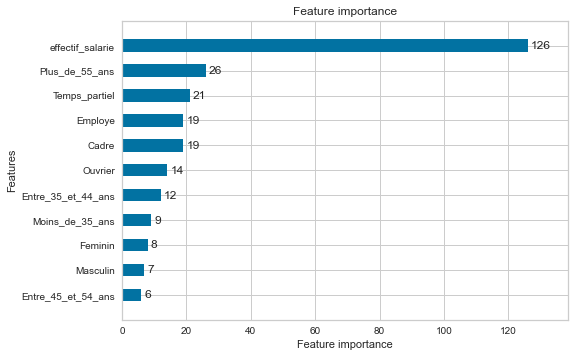

In [25]:
# plottin"bg feature importance
lgb.plot_importance(model, height = .5) 

  ## Regression linéaire 

In [36]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.44049226059315083

X does not have valid feature names, but LinearRegression was fitted with feature names


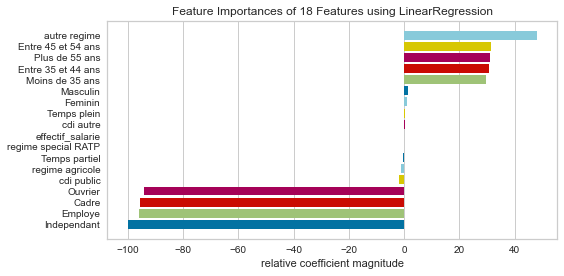

<AxesSubplot:title={'center':'Feature Importances of 18 Features using LinearRegression'}, xlabel='relative coefficient magnitude'>

In [37]:
from yellowbrick.features import (FeatureImportances,)
fig, ax = plt.subplots(figsize = (8,4))
fig_viz = FeatureImportances(lr, labels = X.columns)
fig_viz.fit(X_train, y_train)
fig_viz.poof()

## Decision tree regressor


In [54]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
yhat = dt.predict(X_test)
r2_score(y_test, yhat), mean_absolute_error(y_test, yhat), np.sqrt(mean_squared_error(y_test, yhat))

(0.8015978488807538, 438.88134206219314, 1121.077648745699)

In [47]:
def boost_models(x, trans = True):
    # transforming target variable through quantile transformer
    if trans:
        regr_trans = TransformedTargetRegressor(regressor=x, transformer=QuantileTransformer(output_distribution='normal'))
        regr_trans.fit(X_train, y_train)
        yhat = regr_trans.predict(X_test)
        algoname= x.__class__.__name__
    else :
        x.fit(X_train, y_train)
        yhat = x.predict(X_test)
        algoname= x.__class__.__name__
    return algoname, round(r2_score(y_test, yhat),3), round(mean_absolute_error(y_test, yhat),2), round(np.sqrt(mean_squared_error(y_test, yhat)),2)

In [51]:
algo=[DecisionTreeRegressor(), GradientBoostingRegressor(), lgbm.LGBMRegressor(), xg.XGBRFRegressor()]
score=[]
for a in algo:
    score.append(boost_models(a))

# Collate all scores in a table
pd.DataFrame(score, columns=['Model', 'Score', 'MAE', 'RMSE'])

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Model  Score     MAE     RMSE
0      DecisionTreeRegressor  0.821  401.79  1066.07
1  GradientBoostingRegressor  0.902  279.87   788.52
2              LGBMRegressor  0.890  283.59   834.61
3             XGBRFRegressor  0.875  288.60   890.02

In [31]:
algo=[DecisionTreeRegressor(), GradientBoostingRegressor(), lgbm.LGBMRegressor(), xg.XGBRFRegressor()]
score=[]
for a in algo:
    score.append(boost_models(a, trans = False))

 # Collate all scores in a table
pd.DataFrame(score, columns=['Model', 'Score', 'MAE', 'RMSE'])

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Model  Score     MAE     RMSE
0      DecisionTreeRegressor  0.801  432.09  1121.69
1  GradientBoostingRegressor  0.920  278.43   710.97
2              LGBMRegressor  0.891  307.07   831.50
3             XGBRFRegressor  0.903  300.66   782.08

# Decision tree regressor 

In [120]:
dt = DecisionTreeRegressor(random_state = 0, min_samples_leaf = 20, ccp_alpha = 0.0001) 
dt_trans = TransformedTargetRegressor(regressor=dt, transformer=QuantileTransformer(output_distribution='normal'))
dt_trans.fit(X_train, y_train)
yhat = dt_trans.predict(X_test)
r2_score(y_test, yhat), mean_absolute_error(y_test, yhat), np.sqrt(mean_squared_error(y_test, yhat))

(0.8755038434016648, 305.1039068877516, 888.0562555829191)

In [58]:
# arbre total
export_graphviz(dt_trans.regressor_, out_file ='tree_structure.dot', 
               feature_names =X_train.columns)

In [100]:
# arbre avec une profondeur de 3
dot_data = export_graphviz(dt_trans.regressor_, max_depth = 3, out_file = 'tree_file.dot', 
               feature_names = X.columns, filled = True)

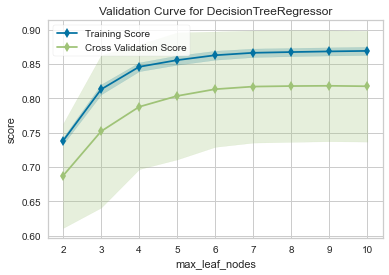

<AxesSubplot:title={'center':'Validation Curve for DecisionTreeRegressor'}, xlabel='max_leaf_nodes', ylabel='score'>

In [123]:
# courbe de validation 
from yellowbrick.model_selection import (ValidationCurve,)

fig, ax = plt.subplots(figsize = (6,4))
vc_viz = ValidationCurve( 
    DecisionTreeRegressor(random_state = 0, min_samples_leaf = 20, ccp_alpha = 0.0001),
    param_name = "max_leaf_nodes", param_range=np.arange(1, 11), cv=10, scoring="r2", njobs = -1)
vc_viz.fit(X_train, y_train)
vc_viz.poof()

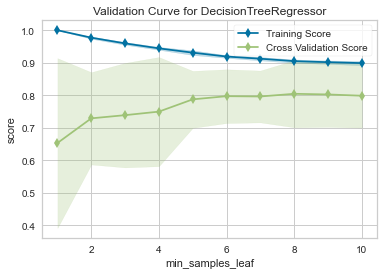

<AxesSubplot:title={'center':'Validation Curve for DecisionTreeRegressor'}, xlabel='min_samples_leaf', ylabel='score'>

In [124]:
# courbe de validation 
from yellowbrick.model_selection import (ValidationCurve,)

fig, ax = plt.subplots(figsize = (6,4))
vc_viz = ValidationCurve( 
    DecisionTreeRegressor(random_state = 0, min_samples_leaf = 20, ccp_alpha = 0.0001),
    param_name = "min_samples_leaf", param_range=np.arange(1, 11), cv=10, scoring="r2", njobs = -1)
vc_viz.fit(X_train, y_train)
vc_viz.poof()

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


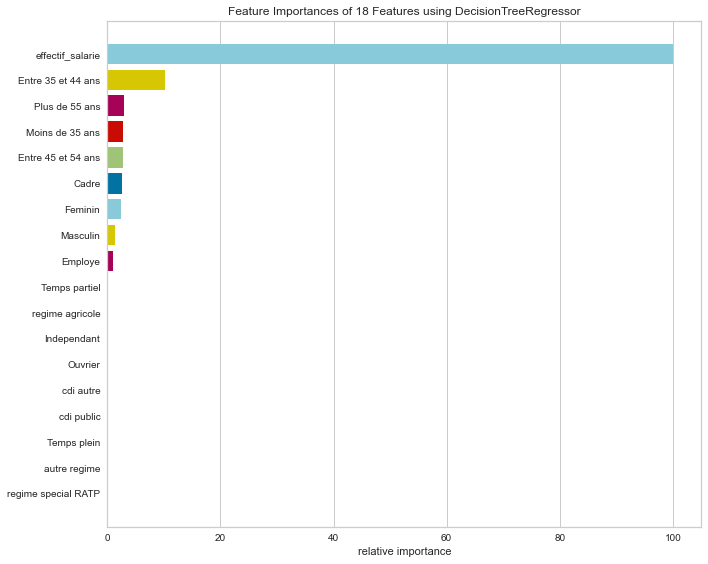

<AxesSubplot:title={'center':'Feature Importances of 18 Features using DecisionTreeRegressor'}, xlabel='relative importance'>

In [128]:
fig , ax = plt.subplots(figsize=(10,8))
tree_viz = FeatureImportances(dt_trans.regressor_)
tree_viz.fit(X_train,y_train)
tree_viz.poof()

# Hyperparamaeters tuning 

In [304]:
param_grid = {'n_estimators': [100, 80, 60, 55, 51, 45],  
              'max_depth': [7, 8],
              'reg_lambda' :[0.26, 0.25, 0.2]
             }
                
grid = GridSearchCV(xg.XGBRFRegressor(), param_grid, refit = True, verbose = 3, n_jobs=-1) #
regr_trans = TransformedTargetRegressor(regressor=grid, transformer=QuantileTransformer(output_distribution='normal'))

# fitting the model for grid search 
grid_result=regr_trans.fit(X_train, y_train)
best_params=grid_result.regressor_.best_params_
print(best_params)

#using best params to create and fit model
best_model = xg.XGBRFRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], reg_lambda=best_params["reg_lambda"])
regr_trans = TransformedTargetRegressor(regressor=best_model, transformer=QuantileTransformer(output_distribution='normal'))
regr_trans.fit(X_train, y_train)
yhat = regr_trans.predict(X_test)

#evaluate metrics
r2_score(y_test, yhat), mean_absolute_error(y_test, yhat), np.sqrt(mean_squared_error(y_test, yhat))


Fitting 5 folds for each of 36 candidates, totalling 180 fits


pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


{'max_depth': 8, 'n_estimators': 60, 'reg_lambda': 0.2}


pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


(0.889703412400723, 277.9932000477068, 835.8792490079447)

In [305]:
param_grid = {'n_estimators': [100, 80, 60, 50, 45],  
              'max_depth': [3, 4, 5, 6],
              'learning_rate' :[0.2, 0.15]
             }
                
grid = GridSearchCV(GradientBoostingRegressor(), param_grid, refit = True, verbose = 0, n_jobs=-1) #
regr_trans = TransformedTargetRegressor(regressor=grid, transformer=QuantileTransformer(output_distribution='normal'))

# fitting the model for grid search 
grid_result=regr_trans.fit(X_train, y_train)
best_params=grid_result.regressor_.best_params_
print(best_params)

#using best params to create and fit model
best_model = GradientBoostingRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], learning_rate=best_params["learning_rate"])
regr_trans = TransformedTargetRegressor(regressor=best_model, transformer=QuantileTransformer(output_distribution='normal'))
regr_trans.fit(X_train, y_train)
yhat = regr_trans.predict(X_test)

#evaluate metrics
r2_score(y_test, yhat), mean_absolute_error(y_test, yhat), np.sqrt(mean_squared_error(y_test, yhat))

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 45}


(0.905782441450374, 271.3228013800724, 772.5532588217037)

In [306]:
param_grid = {'n_estimators': [100, 50, 31],  
              'max_depth': [-1, 3, 4],
              'num_leaves' : [10, 11, 12],
              'learning_rate' : [0.1, 0.01, 0.05]
             }
                
grid = GridSearchCV(lgbm.LGBMRegressor(), param_grid, refit = True, verbose = 0, n_jobs=-1) #
regr_trans = TransformedTargetRegressor(regressor=grid, transformer=QuantileTransformer(output_distribution='normal'))

# fitting the model for grid search 
grid_result=regr_trans.fit(X_train, y_train)
ob = grid_result.regressor_.cv_results_
best_params=grid_result.regressor_.best_params_
print(best_params)

#using best params to create and fit model
best_model = lgbm.LGBMRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], learning_rate=best_params["learning_rate"])
regr_trans = TransformedTargetRegressor(regressor=best_model, transformer=QuantileTransformer(output_distribution='normal'))
regr_trans.fit(X_train, y_train)
yhat = regr_trans.predict(X_test)

#evaluate metrics
r2_score(y_test, yhat), mean_absolute_error(y_test, yhat), np.sqrt(mean_squared_error(y_test, yhat))

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50, 'num_leaves': 12}


(0.8877836646777891, 282.999736823161, 843.1222424278654)

In [307]:
#for mean_score, params in zip(ob["mean_test_score"], ob["params"]):
    #print(np.sqrt(mean_score), params)

In [308]:
#Table to record metrics of various models
metrics=pd.DataFrame()
Model=[]
rmse=[]
mae=[]
r2=[]
ExpVarScore = []

In [309]:
model = GradientBoostingRegressor(learning_rate = 0.15, max_depth = 3, n_estimators = 45)   #n_estimators = 50, max_depth=5,  num_leaves=11
regr_trans = TransformedTargetRegressor(regressor=model, transformer=QuantileTransformer(output_distribution='normal'))
regr_trans.fit(X_train, y_train)
yhat = regr_trans.predict(X_test)

Model.append("Gradient Boosted Regression")
rmse.append(round(np.sqrt(mean_squared_error(y_test, yhat)),3))
mae.append(round(mean_absolute_error(y_test, yhat),3))
r2.append(round(r2_score(y_test, yhat),3))
ExpVarScore.append(round(explained_variance_score(y_test, yhat),3))

In [310]:
model = xg.XGBRFRegressor(n_estimators = 80, max_depth=7, reg_lambda=0.25)  #n_estimators = 51, max_depth=7, reg_lambda=0.27

regr_trans = TransformedTargetRegressor(regressor=model, transformer=QuantileTransformer(output_distribution='normal'))
regr_trans.fit(X_train, y_train)
yhat = regr_trans.predict(X_test)

Model.append("XGBoost Regression")
rmse.append(round(np.sqrt(mean_squared_error(y_test, yhat)),3))
mae.append(round(mean_absolute_error(y_test, yhat),3))
r2.append(round(r2_score(y_test, yhat),3))
ExpVarScore.append(round(explained_variance_score(y_test, yhat),3))

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


In [311]:
model = lgbm.LGBMRegressor(n_estimators = 100, max_depth=3, num_leaves=10, learning_rate= 0.05)   #n_estimators = 50, max_depth=5,  num_leaves=11
us = TransformedTargetRegressor(regressor=model, transformer=QuantileTransformer(output_distribution='normal'))
us.fit(X_train, y_train)
yhat = us.predict(X_test)

Model.append("Light GBM Regression")
rmse.append(round(np.sqrt(mean_squared_error(y_test, yhat)),3))
mae.append(round(mean_absolute_error(y_test, yhat),3))
r2.append(round(r2_score(y_test, yhat),3))
ExpVarScore.append(round(explained_variance_score(y_test, yhat),3))

In [312]:
model = lgbm.LGBMRegressor(n_estimators = 100, max_depth=3, num_leaves=10, learning_rate= 0.05)   #n_estimators = 50, max_depth=5,  num_leaves=11
us = TransformedTargetRegressor(regressor=model, func=np.log1p, inverse_func=np.expm1)
us.fit(X_train, y_train)
yhat = us.predict(X_test)

Model.append("Light GBM Regression v2")
rmse.append(round(np.sqrt(mean_squared_error(y_test, yhat)),3))
mae.append(round(mean_absolute_error(y_test, yhat),3))
r2.append(round(r2_score(y_test, yhat),3))
ExpVarScore.append(round(explained_variance_score(y_test, yhat),3))

On abandonne la version 3

In [313]:
# Modele avec gamma
#from scipy.stats import gamma, invgamma

# def target_transform(target):
#     target_ = target.copy()
#     target_ =  gamma.pdf(target_, 0.227501)/35935.829532  
#     return target_

# def inverse_target_transform(target):
#     target_ = target.copy()
#     target_ =  invgamma.pdf(target_, 0.227501)/35935.829532  
#     return target_


# model = lgbm.LGBMRegressor(n_estimators = 50, max_depth=3, num_leaves=10, learning_rate= 0.1)   #n_estimators = 50, max_depth=5,  num_leaves=11
# us = TransformedTargetRegressor(regressor=model, func=target_transform, inverse_func=inverse_target_transform)
# us.fit(X_train, y_train)
# yhat = us.predict(X_test)

# Model.append("Light GBM Regression v3")
# rmse.append(round(np.sqrt(mean_squared_error(y_test, yhat)),3))
# mae.append(round(mean_absolute_error(y_test, yhat),3))
# r2.append(round(r2_score(y_test, yhat),3))
# print(r2)

In [314]:
metrics['Model']=Model
metrics['rmse']=rmse
metrics['mae']=mae
metrics['r2']=r2
metrics['ExpVarScore'] = ExpVarScore
metrics

Model      rmse      mae     r2  ExpVarScore
0  Gradient Boosted Regression   709.206  269.891  0.921        0.923
1           XGBoost Regression   834.271  278.035  0.890        0.892
2         Light GBM Regression   858.406  284.582  0.884        0.887
3      Light GBM Regression v2  1099.270  329.903  0.809        0.817

In [479]:
# A NE PAS TOUCHER -- premier modele
print(metrics.to_latex(index=False)) 

\begin{tabular}{lrrr}
\toprule
                      Model &      rmse &      mae &     r2 \\
\midrule
Gradient Boosted Regression & 10664.803 & 3301.831 &  0.654 \\
         XGBoost Regression & 10930.751 & 3007.544 &  0.636 \\
       Light GBM Regression &  9319.361 & 2752.841 &  0.736 \\
    Light GBM Regression v2 &  9853.496 & 2802.596 &  0.705 \\
    Light GBM Regression v3 & 19474.384 & 7110.803 & -0.154 \\
\bottomrule
\end{tabular}



C:\Users\M22UO01\AppData\Local\Temp\ipykernel_13424\303855050.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(metrics.to_latex(index=False))


In [555]:
# A NE PAS TOUCHER  --- deuxieme modele
print(metrics.to_latex(index=False)) 

\begin{tabular}{lrrr}
\toprule
                      Model &     rmse &      mae &     r2 \\
\midrule
Gradient Boosted Regression & 3749.431 & 1046.290 &  0.766 \\
         XGBoost Regression & 3854.148 & 1092.812 &  0.753 \\
       Light GBM Regression & 3681.247 & 1003.650 &  0.774 \\
    Light GBM Regression v2 & 3450.206 &  939.493 &  0.802 \\
    Light GBM Regression v3 & 8052.804 & 2181.542 & -0.079 \\
\bottomrule
\end{tabular}



C:\Users\M22UO01\AppData\Local\Temp\ipykernel_13424\360842933.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(metrics.to_latex(index=False))


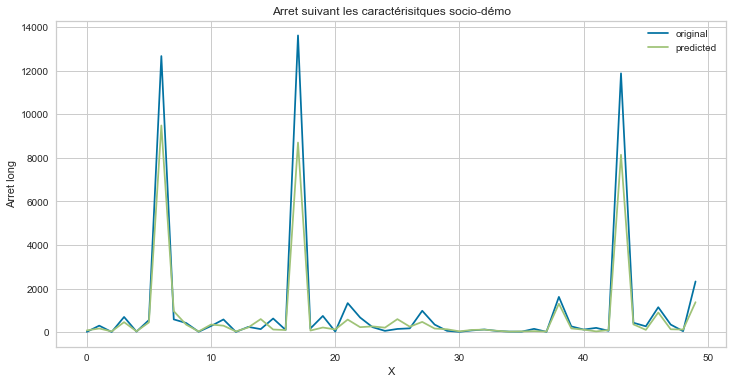

In [315]:
# visualizing in a plot

x_ax = range(len(y_test.iloc[0:50]))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test[0:50], label="original")
plt.plot(x_ax, yhat[0:50], label="predicted")
plt.title("Arret suivant les caractérisitques socio-démo")
plt.xlabel('X')
plt.ylabel('Arret long')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  



`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).


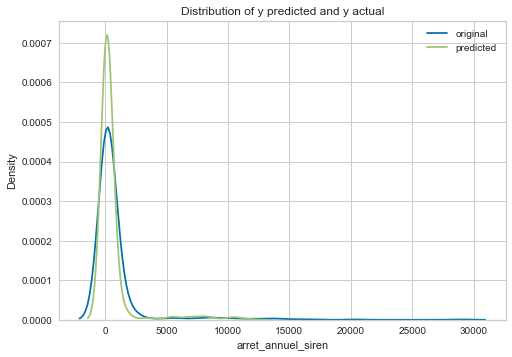

In [316]:
plt.title("Distribution of y predicted and y actual")
ax1=sns.distplot(y_test, hist=False, label='original')
sns.distplot(yhat, hist=False, ax=ax1, label='predicted')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.show()

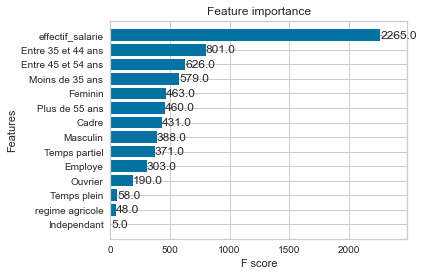

In [333]:
fig, ax = plt.subplots(figsize = (6, 4))
xg.plot_importance(regr_trans.regressor_, ax = ax, height=.8)
fig.tight_layout()

## Metrique d'evaluation : diagramme des residus

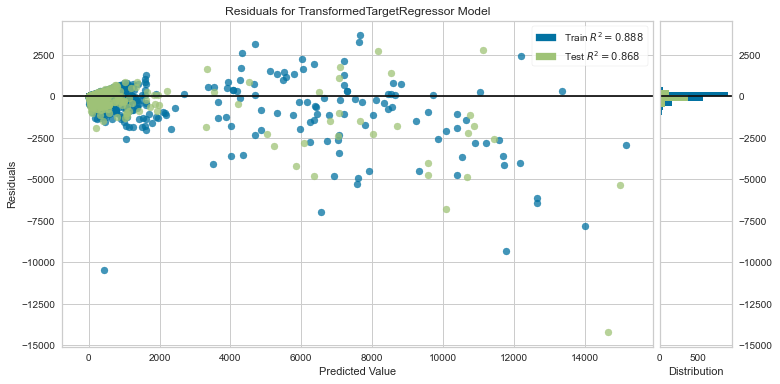

<AxesSubplot:title={'center':'Residuals for TransformedTargetRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [325]:
fig, ax = plt.subplots(figsize = (12, 6))
rfr = GradientBoostingRegressor(learning_rate = 0.15, max_depth = 3, n_estimators = 45)
vb = TransformedTargetRegressor(regressor=rfr, func=np.log1p, inverse_func=np.expm1)
rpv = ResidualsPlot(vb)
rpv.fit(X_train, y_train)
rpv.score(X_test, y_test)
rpv.poof()

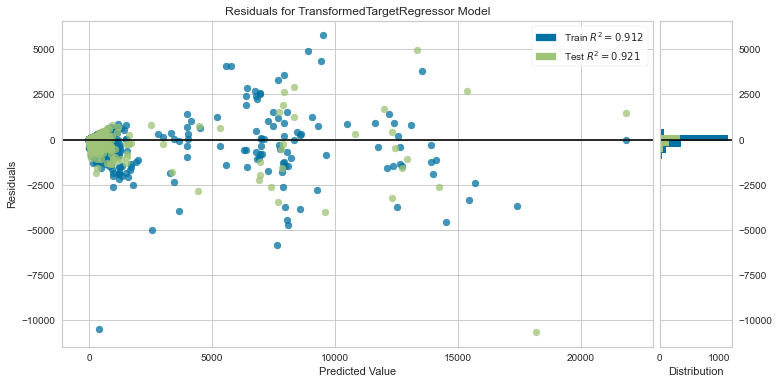

<AxesSubplot:title={'center':'Residuals for TransformedTargetRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [326]:
from yellowbrick.regressor import ResidualsPlot
fig, ax = plt.subplots(figsize = (12, 6))
rfr = GradientBoostingRegressor(learning_rate = 0.15, max_depth = 3, n_estimators = 45)
vb = TransformedTargetRegressor(regressor=rfr, transformer=QuantileTransformer(output_distribution='normal'))
rpv = ResidualsPlot(vb)
rpv.fit(X_train, y_train)
rpv.score(X_test, y_test)
rpv.poof()


### Test d'hétéroscédasticité de Breusch Pagan 

In [334]:
import statsmodels.stats.api as sms

In [335]:
vb.fit(X_train, y_train)
resids = y_test - vb.predict(X_test)
hb = sms.het_breuschpagan(resids, X_test)
name = [
    "Lagrange multiplier statistic",
    "p-value",
    "f-value",
    "f p-value"
]

In [336]:
for name, num in zip(name, hb):
    print(f"{name} : {num:.2}")

Lagrange multiplier statistic : 2.9e+02
p-value : 1.3e-50
f-value : 4e+01
f p-value : 7.9e-73


 p-value inferieure à 0.05
On rejette l'hypothèse d'homoscédascité

# SHAP VALUE 

In [337]:
shap.initjs()

In [338]:
rfr = GradientBoostingRegressor(learning_rate = 0.15, max_depth = 3, n_estimators = 45)
vb = TransformedTargetRegressor(regressor=rfr, transformer=QuantileTransformer(output_distribution='normal'))
vb.fit(X_train, y_train)

TransformedTargetRegressor(regressor=GradientBoostingRegressor(learning_rate=0.15,
                                                               n_estimators=45),
                           transformer=QuantileTransformer(output_distribution='normal'))

In [339]:
exp = shap.TreeExplainer(vb.regressor_)

In [340]:
vals = exp.shap_values(X_test)

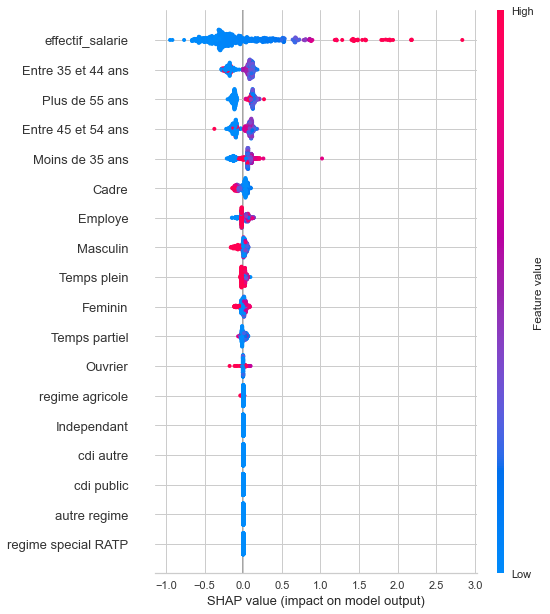

In [341]:
fig, ax = plt.subplots(figsize = (6,4))
shap.summary_plot(vals, X_test)

# Regression sans les variables explicatives non significatives


In [178]:
data = pd.read_csv("C:/Users/M22UO01/Downloads/Dossier memoire/data3.csv")
df = data.copy()
df = df.drop(columns= ['t06_siren', 'Non mentionne', 'taux_absenteisme', 'regime special RATP', 'autre regime', 'cdi public', 
                       'cdi autre', 'Independant', 'regime agricole'])
df =df.fillna(0)
y = df['arret_annuel_siren']
X = df.drop(['arret_annuel_siren'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.25, random_state=32)
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgbm
import xgboost as xg

#generic function to fit model and return metrics for every algorithm
def boost_models(x):
    #transforming target variable through quantile transformer
    regr_trans = TransformedTargetRegressor(regressor=x, transformer=QuantileTransformer(output_distribution='normal'))
    regr_trans.fit(X_train, y_train)
    yhat = regr_trans.predict(X_test)
    algoname= x.__class__.__name__
    return algoname, round(r2_score(y_test, yhat),3), round(mean_absolute_error(y_test, yhat),2), round(np.sqrt(mean_squared_error(y_test, yhat)),2)

algo=[DecisionTreeRegressor(), GradientBoostingRegressor(), lgbm.LGBMRegressor(), xg.XGBRFRegressor()]
score=[]
for a in algo:
    score.append(boost_models(a))

 #Collate all scores in a table
pd.DataFrame(score, columns=['Model', 'Score', 'MAE', 'RMSE'])

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


Model  Score      MAE     RMSE
0      DecisionTreeRegressor  0.556  1584.69  5167.25
1  GradientBoostingRegressor  0.768  1020.43  3735.00
2              LGBMRegressor  0.740  1028.78  3955.67
3             XGBRFRegressor  0.762  1066.13  3782.04

In [275]:
model = lgbm.LGBMRegressor(n_estimators = 50, max_depth=3, num_leaves=10, learning_rate= 0.1)   #n_estimators = 50, max_depth=5,  num_leaves=11
us = TransformedTargetRegressor(regressor=model, func=np.log1p, inverse_func=np.expm1)
us.fit(X_train, y_train)
yhat = us.predict(X_test)

Model.append("Light GBM Regression v2")
rmse.append(round(np.sqrt(mean_squared_error(y_test, yhat)),3))
mae.append(round(mean_absolute_error(y_test, yhat),3))
r2.append(round(r2_score(y_test, yhat),3))
print(rmse)

[848.165, 742.124, 756.899, 884.3, 911.755, 911.755, 911.755]


In [180]:
X_train.shape

(1459, 12)

In [181]:
X_train.head()

Entre 35 et 44 ans  Entre 45 et 54 ans  Moins de 35 ans  Plus de 55 ans  \
746                 0.33                0.33             0.33             0.0   
2085                0.50                0.10             0.40             0.0   
2414                0.00                0.00             1.00             0.0   
1773                0.45                0.18             0.36             0.0   
710                 0.20                0.20             0.40             0.2   

      effectif_salarie  Feminin  Masculin  Cadre  Employe  Ouvrier  \
746              15.58     0.00      0.00   0.67     0.33      0.0   
2085             20.96     0.20      0.80   0.00     1.00      0.0   
2414              0.67     1.00      0.00   0.00     1.00      0.0   
1773             20.90     0.27      0.73   0.00     1.00      0.0   
710              23.91     0.40      0.60   0.00     1.00      0.0   

      Temps partiel  Temps plein  
746            0.33         0.67  
2085           0.10         0.90  
2414           0.00         1.00  
1773           0.00         1.00  
710            0.20         0.80

La derniere valeur montre ainsi qu'on retombe sur le même niveau de score avec ces différentes colonnes en moins

Les arbres de décision sont assez mauvais avec le score obtenu par rapport aux autres modèles. 